# Innlevering 6

## Oppgave 1

Anta at vi har observert observasjonspar $(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)$ og at vi ønsker å tilpasse disse til en regresjonsmodell på formen

$Y_i = a x_i + \varepsilon_i$,

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ antas uavhengige og identisk normalfordelt med forventningsverdi lik null og varians lik $\sigma^2$. Vi har dermed at $Y_1,Y_2,\ldots,Y_n$ er uavhengige stokastiske variabler, og $Y_i\sim N(ax_i,\sigma^2)$.

Merk at vi altså betrakter de observerte verdiene $y_1,y_2,\ldots,y_n$ som realisasjoner av stokastiske variabler $Y_1,Y_2,\ldots,Y_n$, mens verdiene $x_1,x_2,\ldots,x_n$ betrakter vi som kjente tall.

Modellen har to parametre, $a$ og $\sigma^2$, og vi ønsker å estimere verdien til disse fra de observerte parene $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$.

### Deloppgave a) **

Finn uttrykk for rimelighetsfunksjonen $L(a,\sigma^2)$ for situasjonen over.

Bruk $L(a,\sigma^2)$ til å finne uttrykk for log-rimelighetsfunksjonen $\ell (a,\sigma^2)$.

Finn sannsynlighetsmaksimeringsestimatorene for $a$ og $\sigma^2$ og vis at disse kan skrives på formen

$$\hat{a}=\frac{\sum_{i=1}^n x_iY_i}{\sum_{i=1}^n x_i^2},\,\,\,\, 
\widehat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n \left(Y_i-\hat{a}x_i\right)^2.$$

### Deloppgave b) *

Finn forventningsverdi og varians for estimatoren $\hat{a}$. Du skal forenkle uttrykkene så mye det lar seg gjøre.

Er $\hat{a}$ forventningsrett? Begrunn svaret.

#### Her er deloppgave b) slutt.

Det kan vises (NB: du trenger ikke vise det) at 

$\sum_{i=1}^n \left(\frac{Y_i-\hat{a}x_i}{\sigma}\right)^2 \sim \chi^2_{n-1}$.

Dette resultatet kan du benytte til å besvare spørsmålene under.

### Deloppgave c) *

Finn forventningsverdien til $\widehat{\sigma}^2$. 

Forklar hvordan du kan se at $\widehat{\sigma}^2$ er forventningsskjev.

Foreslå en "korrigert" estimator for $\sigma^2$ (kall denne $\tilde\sigma^2$) som er forventningsrett.

Finn variansen til den forventningsrette estimatoren for $\sigma^2$.

## Oppgave 2 *

I denne oppgaven skal du benytte stokastisk simulering til å utforske hvordan et residualplott ser ut når modellen som antas i enkel lineær regresjon er korrekt og hvordan residualplott ser ut i noen tilfeller hvor den antatte modellen ikke er korrekt.

Vi skal starte med å anta følgende modell. For $i=1,2,\ldots,n$ la

$y_i = 0.5 + 0.25 x_i + \varepsilon_i$,

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ er uavhengige og normalfordelte med forventningsverdi lik null og varians lik $0.25^2$. Her er altså modellen som antas i enkel lineær regresjon korrekt, og parameterverdiene er $\alpha=0.5$, $\beta=0.25$ og $\sigma=0.25$.

I python-koden under har du fått oppgitt verdier for $x_i$ $i=1,2,...,25$. Deretter genereres tilhørende verdier for $y_1,y_2,\ldots,y_n$ ifølge modellen formulert ovenfor. De genererte verdiene visuliseres så i et spredningsplott.

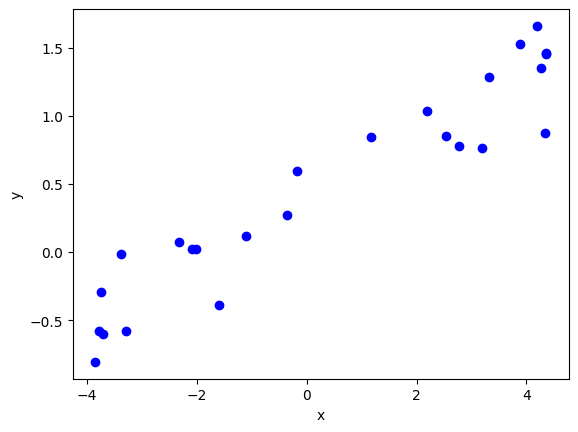

In [11]:
# Du trenger ikke endre noe i denne koden!

import numpy as np
#from scipy.stats import norm
import matplotlib.pyplot as plt

#Initialisering av parameterverdier
n = 25
alpha = 0.5
beta = 0.25
sigma = 0.25

#Simulering av data etter modell
# x_1,x_2,...,x_n i intervallet [-5,5]
x = np.array([-3.842, -3.784, -3.745, -3.708, -3.37,  -3.288, -2.312, -2.078, -2.019, 
              -1.595,-1.106, -0.352, -0.171,  1.166,  2.196,  2.538,  2.772,  3.186,  
              3.309,3.876, 4.2,    4.261,  4.337,  4.352,  4.359])
# genererer tilhørende verdier for y_1,y_2,...,y_n
y = alpha + beta * x + np.random.normal(loc=0,scale=sigma,size=n) 

#Visualiserer resultatet i et plott
plt.plot(x,y,'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Under er det gitt en python-funksjon som tar vektorer $x$ og $y$ som input og regner ut estimatene $\hat{\alpha}$, $\hat{\beta}$ og $S^2$ i en enkel lineær regresjonsmodell. Dette er tilsvarende metode som ble gjort i oppgave 1, bare nå med et konstantledd (SME for lineærregresjon, og forventningsrett estimator for variansen).

In [12]:
# Du trenger ikke endre noe i denne koden!

def estimerELR(x,y):
    #Beregner gjennomsnitt
    xStrek = np.mean(x)
    yStrek = np.mean(y)
    #Estimater for parametere
    betaHat = np.sum((x-xStrek)*y)/np.sum((x-xStrek)**2)
    alphaHat = yStrek - betaHat * xStrek
    S2 = np.sum((y-(alphaHat+betaHat*x))**2)/(len(x)-2)
    #Returnerer resultatet i en liste
    return [alphaHat,betaHat,S2]

paramHat = estimerELR(x,y)
print('alphaHat: ',paramHat[0])
print('betaHat: ',paramHat[1])
print('s2: ',paramHat[2])     

alphaHat:  0.384839912876973
betaHat:  0.22991785168692883
s2:  0.05828676400861244


### Deloppgave a) 
Kjør de to bitene med python-kode gitt over. Betrakt nå de genererte $x$ og $y$-verdiene som observerte verdier, og skriv under python-kode som regner ut de resulterende (estimerte) residualene. Lag også et residualplott hvor du plotter $x_i$-verdiene langs $x$-aksen og de (estimerte) residualene langs $y$-aksen. 

Kjør gjerne (alle de tre) pythonkodebitene flere ganger slik at du får et inntrykk av hvordan residualplottet varierer for ulike datasett (generert fra den spesifiserte regresjonsmodellen). Diskuter kort hva du ser (eller ikke kan se) i residualplottene.

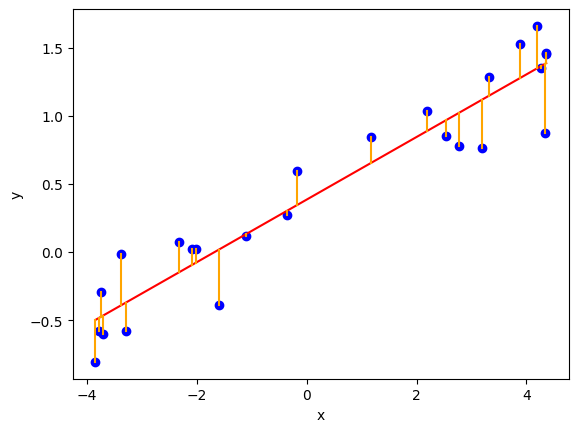

In [17]:
# Plot the correct line and the residuals
plt.plot(x,y,'bo')
plt.plot(x,paramHat[0]+paramHat[1]*x,'r')
for i in range(n):
    plt.plot([x[i],x[i]],[y[i],paramHat[0]+paramHat[1]*x[i]],'orange')

plt.xlabel('x')
plt.ylabel('y')
plt.show()




#### Her er deloppgave a) slutt.

Du skal så utforske hvordan et residualplott kan bli seende ut når modellen som antas i enkel lineær regresjon ikke er korrekt. For å gjøre dette kan du bruke samme $x$-verdier som du brukte i forrige deloppgave. Deretter skal du generere $y$-verdier ifølge

$y_i = 0.5 + 0.25 x_i + 0.02 x_i^2 + \varepsilon_i,$

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ er uavhengige og normalfordelte med forventningsverdi null og varians lik $0.10^2$.

### Deloppgave b)


Skriv python-kode som genererer $n=25$ par $(x_i,y_i)$ som beskrevet over. Betrakt så disse simulerte dataene som observerte data og tilpass en enkel lineær regresjonsmodell ved å kalle python-funksjonen estimerELR gitt over. Regn så ut (estimerte) residualer og generer residualplott. 

Kjør gjerne python-koden flere ganger slik at du får et inntrykk av hvordan residualplottet varierer for ulike datasett (generert fra den spesifiserte modellen). Diskuter kort hva du ser (eller ikke kan se) i residualplottene.

In [ ]:
# Her kan du skrive din python-kode



#### Her er deloppgave b) slutt.

Du skal så utforske hvordan residualplottet blir seende ut for en annen modell som avviker fra hva som antas i en enkel lineær regresjonsmodell. Bruk samme $x_i$-verdier slik som over. Genererer deretter $y_i$-verdier ifølge

$y_i = 0.5 + 0.25 x_i + \varepsilon_i,$

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ er uavhengige og $\varepsilon_i\sim N(0,0.10^2\cdot(0.1+x_i^2))$


### Deloppgave c)

Skriv og kjørpython-kode som simulerer $y$-verdier som beskrevet over, og så bruker disse tilsvarende som i oppgave b) over til å generere tilhørende residualplott. 

Kjør gjerne python-koden flere ganger slik at du får et inntrykk av hvordan residualplottet varierer for ulike datasett (generert fra den spesifiserte modellen). Diskuter kort hva du ser (eller ikke kan se) i residualplottene.

In [ ]:
# Her kan du skrive din python-kode



## Oppgave 3 *
Vi skal i denne oppgaven anta at bremselengden, $Y$ , målt i meter for en bil som kjører $x$ km/time antas å være normalfordelt med forventningsverdi $\beta x^2$ og standardavvik $\sigma x$. En bil som for eksempel kjører i 50 km/time vil dermed ha en bremselengde som er normalfordelt med forventningsverdi $2500\beta$ og standardavvik $50\sigma$. Modellen har to parametre, $\beta$ og $\sigma^2$, og disse vil avhenge av forsøksbetingelsene, som for eksempel dekkenes egenskaper, veidekke og vær- og føreforhold.

Anta nå at verdiene til $\beta$ og $\sigma^2$ er ukjent og skal estimeres. For å estimere disse parametrene gjøres $n$ bremseprøver med ulike hastigheter, men forøvrig under identiske forsøksbetingelser. La $x_i$ betegne hastigheten benyttet ved bremseprøve nummer $i$, og la $Y_i$ være tilhørende bremselengde. Vi skal anta at bremseprøvene utføres på en slik måte at det er rimelig å betrakte $Y_1,Y_2,\ldots,Y_n$ som uavhengige stokastiske variabler. Vi lar som vanlig $y_1,y_2,\ldots,y_n$ betegne de målte bremselengdene.

### Deloppgave a)

Utled estimatorer for $\beta$ og $\sigma^2$ ved å benytte sannsynlighetsmaksimeringsprinsippet. Vis at estimatorene kan skrives på formen

\begin{align*}
\hat{\beta}&=\frac{\sum_{i=1}^n Y_i}{\sum_{i=1}^n x_i^2},\\
\widehat{\sigma}^2 &= \frac{1}{n}\sum_{i=1}^n \left(\frac{Y_i-\hat{\beta}x_i^2}{x_i}\right)^2.~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
\end{align*}

### Deloppgave b)

Finn forventningsverdi og varians for estimatoren $\hat{\beta}$. 

Hvilken sannsynlighetsfordeling har $\hat{\beta}$? Begrunn svaret.

### Deloppgave c)

Bruk antagelsene gjort i oppgaveteksten over og sammenhenger mellom fordelinger som vi har diskutert tidligere i kurset til å vise at 

\begin{align*}
\sum_{i=1}^n \left(\frac{Y_i-\beta x_i^2}{\sigma x_i}\right)^2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
\end{align*}

er $\chi^2$-fordelt med $n$ frihetsgrader. Merk at det i uttrykket over står den (ukjente) sanne verdien $\beta$. 

#### Her er deloppgave c) slutt.

Videre i oppgaven kan du uten bevis benytte at dersom man i uttrykket gitt i deloppgave c) erstatter den (ukjente) sanne verdien $\beta$ med estimatoren $\hat{\beta}$ vil størrelsen fremdeles være $\chi^2$-fordelt, men antall frihetsgrader vil reduseres med en. Man har altså at

\begin{align*}
V = \sum_{i=1}^n \left(\frac{Y_i-\hat{\beta} x_i^2}{\sigma x_i}\right)^2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
\end{align*}

er $\chi^2$-fordelt med $n-1$ frihetsgrader. Du kan dessuten uten bevis benytte at $\hat{\beta}$ og $V$ er uavhengige stokastiske variabler.

### Deloppgave d)

Identifiser en pivotal som kan brukes til å utlede en konfidensintervall for $\beta$. Vis hvilken sannsynlighetsfordeling pivotalen har, og bruk så dette til å utlede et $(1-\alpha)\cdot 100\%$-konfidensintervall for $\beta$.


## Oppgave 4
I denne oppgaven skal vi tilpasse en enkel lineær regresjonsmodell til et datasett hvor $x_i$-ene er målt tetthet til australsk tømmer, mens tilhørende $y_i$ er målt verdi for den såkalte Janka-hardheten til det samme tømmeret. En grundigere presentasjon og diskusjon av datasettet finnes i 'E.J. Williams. Regression analysis. John Wiley & Sons Inc., New York, 1959; Tabell 3.1, side 43'.

### Deloppgave a) *

alphaHat:  -1160.4997036594077
betaHat:  57.50667476417559
s2:  33510.778715229375


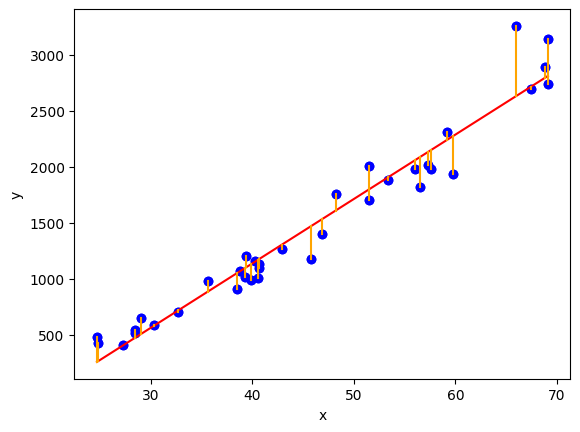

In [26]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.array([24.7,24.8,27.3,28.4,28.4,29.0,30.3,32.7,35.6,38.5,38.8,39.3,39.4,39.9,40.3,40.6,40.7,40.7,
              42.9,45.8,46.9,48.2,51.5,51.5,53.4,56.0,56.5,57.3,57.6,59.2,59.8,66.0,67.4,68.8,69.1,69.1])
y = np.array([484,427,413,517,549,648,587,704,979,914,1070,1020,1210,989,1160,1010,1100,1130,1270,1180,
              1400,1760,1710,2010,1880,1980,1820,2020,1980,2310,1940,3260,2700,2890,2740,3140])


plt.plot(x,y,'bo')
plt.xlabel('x')
plt.ylabel('y')


def estimerELR(x,y):
    #Beregner gjennomsnitt
    xStrek = np.mean(x)
    yStrek = np.mean(y)
    #Estimater for parametere
    betaHat = np.sum((x-xStrek)*y)/np.sum((x-xStrek)**2)
    alphaHat = yStrek - betaHat * xStrek
    S2 = np.sum((y-(alphaHat+betaHat*x))**2)/(len(x)-2)
    #Returnerer resultatet i en liste
    return [alphaHat,betaHat,S2]

paramHat = estimerELR(x,y)
print('alphaHat: ',paramHat[0])
print('betaHat: ',paramHat[1])
print('s2: ',paramHat[2])

plt.plot(x,y,'bo')
plt.plot(x,paramHat[0]+paramHat[1]*x,'r')
for i in range(len(x)):
    plt.plot([x[i],x[i]],[y[i],paramHat[0]+paramHat[1]*x[i]],'orange')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Visualiser dataene i et spredningsplott. 

Anta så en enkel lineær regresjonsmodell for dataene og estimer parametrene $\alpha$, $\beta$ og $\sigma^2$ basert på sannsynlighetsmaksimeringsprinsippet (dvs. regn ut estimater for de tre parametrene). Legg til den estimerte linja $y=\hat{\alpha}+\hat{\beta}x$ i spredningsplottet.

Regn ut de (estimerte) residualene og visualiser disse i et residualplott. Diskuter det du ser i spredningsplottet og i residualplottet. Tyder plottene på at en enkel lineær regresjonsmodell passer for dette datasettet?

#### Her er deloppgave a) slutt.

Uansett hva du konkluderte med i deloppgave a) skal du videre i oppgaven gi svar basert på en enkel lineær regresjonsmodell. Merk dessuten at du i resten av denne oppgaven kan benytte resultater som er utledet i læreboka/introvideoer/forelesninger, men må passe på at forutsetningene for resultatene du benytter er oppfylt.

### Deloppgave b) *

Benytt datasettet til å gjennomføre en hypotesetest hvor du tester $H_0: \alpha=0$ mot $H_1: \alpha \neq 0$. Dvs. spesifiser hvilken testobservator du vil benytte, angi hvilken sannsynlighetsfordeling testobservatoren har når $H_0$ er sann, finn en beslutningsregel slik at testen får signifikansnivå lik $0.10$, og benytt de observerte data til å bestemme om man skal forkaste $H_0$ eller ikke. 

In [ ]:
# Her kan du skrive python-kode for å gjøre beregningene du trenger for å besvare oppgaven

### Deloppgave c)

Du skal så finne et $90\%$-prediksjonsintervall for Janka-hardheten, $Y_0$ i en trestamme hvor tettheten i trestammen er målt til $x=x_0$. Angi svaret som et intervall hvor nedre og øvre grense i intervallet er en funksjon av $x_0$. Plott opp nedre og øvre grense av prediksjonsintervallet sammen med spredningsplottet for $x_0\in [24,70]$. 

Det å måle hardheten, altså $x$, i en trestamme kan gjøres raskt, mens det å måle Janka-hardheten, altså $Y$, er en mer arbeidskrevende prosess. Basert på dine resultater i denne oppgaven, vil du si at det er fornuftig erstatte en måling av Janka-hardheten med prediksjonen $y=\hat{\alpha}+\hat{\beta}x$ der $x$ er målt hardhet? Begrunn svaret ditt.


In [ ]:
# Her kan du skrive python-kode for å gjøre beregningene du trenger for å besvare oppgaven



## Fasit
- 1a: $L(a,\sigma^2)=(2\pi \sigma^2)^{-n/2}\exp\left\{-\frac{1}{2}\sum_{i=1}^n\frac{(y_i-ax_i)^2}{\sigma^2}\right\}$
- 1b: $\hat a$ er forventningsrett. $\text{Var}[\hat a]=\frac{\sigma^2}{\sum_{i=1}^n x_i^2}$
- 1c: $E[\widehat\sigma^2] = \frac{n-1}{n}\sigma^2$, $\text{Var}[\tilde{\sigma}^2]=\frac{2}{n-1} (\sigma^2)^2$
- 3b: $E[\hat\beta]=\beta$, $\text{Var}[\hat\beta]=\frac{\sigma^2}{\sum^n_{i=1}x_i^2}$
- 3d: $\left[\hat\beta \pm t_{n-1,\alpha/2} \sqrt{\frac{n}{n-1}\frac{\widehat \sigma^2}{\sum^n_{i=1}x_i^2}}\right]$
- 4a: $\hat\alpha = \bar Y - \hat\beta \bar x $,   $\hat\beta = \frac{\sum_{i=1}^n (x_i - \bar x) Y_i}{\sum_{i=1}^n (x_i-\bar x)^2}$,   $\widehat\sigma^2 = \frac 1 n \sum_{i=1}^n(Y_i-(\hat\alpha + \hat\beta x_i))^2  $
- 4b: Forkast $H_0$.
- 4c: $\left[\hat\alpha+\hat\beta x_0 \pm t_{n-2,\alpha/2} \sqrt{\frac{n\widehat\sigma^2}{n-2}\left(1+ \frac 1 n + \frac{(\bar x - x_0)^2}{\sum^n_{i=1}(x_i-\bar x)^2}\right)} \right]$